# Part 1: MNIST Digit Classification

This is a bigginer project to dive into computer vision using CNN (Convolutional Neural Network).

The goal is to classify handwritten digits from the famous [MNIST](http://yann.lecun.com/exdb/mnist/) dataset.

The MNIST dataset consists of 60,000 training images and 10,000 test images. Our classes are the digits 0-9.

First, let's import the relevant packages we'll need for this task:

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

## 1.1 MNIST dataset

Let's download and load the dataset and display a few random samples from it:

In [2]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# See data shape
print(f"Training data shape : {train_images.shape}")
print(f"Test data shape : {test_images.shape}")

Training data shape : (60000, 28, 28)
Test data shape : (10000, 28, 28)


As we can see, images are 28x28 grayscale images.

Before going any further let's expand dimensions and normalize the images

In [3]:
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

Let's visualize how some of these images and their corresponding labels look like:

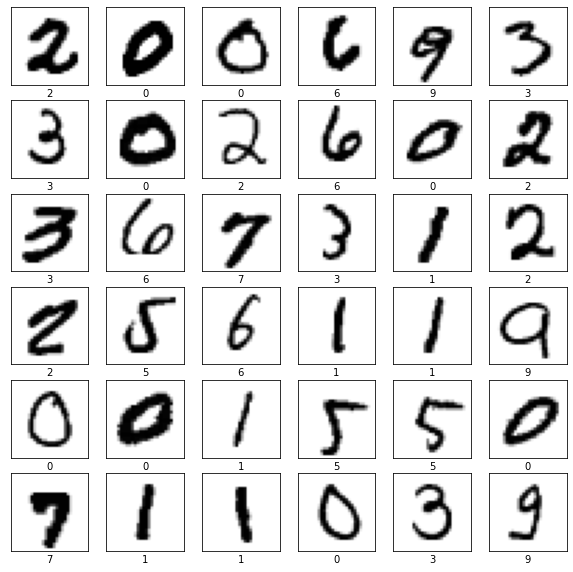

In [4]:
plt.figure(figsize=(10, 10))
random_inds = np.random.choice(train_images.shape[0], 36)
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(train_images[image_ind], cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

## 1.2 Neural Network for Handwritten Digit Classification

I'll start with a simple neural network consisting of two fully connected layers and apply this to the digit classification task. This network will output a probalility distribution over the 10 digit classes (0-9).

### Define the model

In [5]:
def build_fc_model():
    fc_model = tf.keras.Sequential([
        # First we have to flatten the input data in order to go from 2D --> 1D
        tf.keras.layers.Flatten(),
        
        # Add the first Dense layer
        tf.keras.layers.Dense(units=128, activation='relu'),
        
        # Add the output Dense layer
        tf.keras.layers.Dense(units=10, activation='softmax')
    ])
    
    return fc_model

fc_model = build_fc_model()

### Compile the model

In [6]:
fc_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

#### Using *model.fit()*

In [7]:
# Define batchsize and number of epochs to use during training

batch_size = 64
epochs = 5

history = fc_model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs)

Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.3720 - accuracy: 0.8964
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1995 - accuracy: 0.9437
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1488 - accuracy: 0.9579
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1196 - accuracy: 0.9662
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1000 - accuracy: 0.9713


As the model trains, the loss and accuracy metrics are displayed. With five epochs and a learning rate of 0.01, this fully connected model achieves an accuracy of approximately 0.97 (or 97%) on the training data.

### Evaluate accuracy on the test images

Now that the model is trained, we can use it to make predictions on test images

In [8]:
train_loss, train_acc = fc_model.evaluate(train_images, train_labels)

print('Train accuracy :', train_acc)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0899 - accuracy: 0.9751
Train accuracy : 0.9750666618347168


In [9]:
test_loss, test_acc = fc_model.evaluate(test_images, test_labels)

print('Test accuracy :', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1023 - accuracy: 0.9702
Test accuracy : 0.9702000021934509


## 1.3 Convolutional Neural Network (CNN) for handwritten digit classification

Convolutional neural networks (CNNs) are particularly well-suited for a variety of tasks in computer vision.

### Define the CNN model

In [10]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        # First layer
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        
        # Second Layer
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        
        # Third layer
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        
        # Output layer
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    return cnn_model

cnn_model = build_cnn_model()

# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 36)        7812      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 36)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 900)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

### Compile the model

In [11]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])

### Train and test the CNN model

#### using *model.fit()*

In [12]:
# Define batchsize and number of epochs to use during training

batch_size = 64
epochs = 5

cnn_model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs)

Epoch 1/5
938/938 [==============================] - 25s 26ms/step - loss: 0.1832 - accuracy: 0.9460
Epoch 2/5
938/938 [==============================] - ETA: 0s - loss: 0.0530 - accuracy: 0.98 - 29s 30ms/step - loss: 0.0530 - accuracy: 0.9830
Epoch 3/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0363 - accuracy: 0.9886
Epoch 4/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0274 - accuracy: 0.9915
Epoch 5/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0215 - accuracy: 0.9932


As the model trains, the loss and accuracy metrics are displayed. With five epochs and a learning rate of 0.01, this fully connected model achieves an accuracy of approximately 0.99 (or 99%) on the training data.

#### Using *tf.GradientTape()*

In [17]:
# Rebuild the CNN model
cnn_model = build_cnn_model()

batch_size = 12
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2)

if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists

for idx in tqdm(range(0, train_images.shape[0], batch_size)):
    # First grad a batch of training data and convert the input images to tensors
    (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
    images = tf.convert_to_tensor(images, dtype=tf.float32)
    
    # Forward Propagation : GradientTape to record differentiation operations
    with tf.GradientTape() as tape:
        # feed images into the model and get predictions
        logits = cnn_model(images)
        
        # compute loss
        loss = tf.keras.losses.sparse_categorical_crossentropy(labels, logits)
        
    # Backward Propagation
    grads = tape.gradient(loss, cnn_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))
    
    
cnn_model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:31<00:00, 54.51it/s]


### Evaluate the model

In [13]:
train_loss, train_acc = cnn_model.evaluate(train_images, train_labels)

print('Train accuracy :', train_acc)

1875/1875 [==============================] - 10s 5ms/step - loss: 0.0158 - accuracy: 0.9948
Train accuracy : 0.9948166608810425


In [14]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

print('Test accuracy :', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0339 - accuracy: 0.9890
Test accuracy : 0.9890000224113464


### Make predictions

In [15]:
predictions = cnn_model.predict(test_images)

predictions = np.argmax(predictions, axis=1)

Text(0.5, 1.0, 'True label = [8], Predicted = [8]')

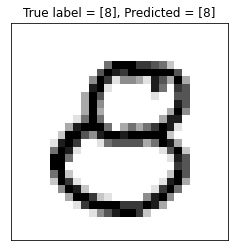

In [16]:
# Set an index and compare predicted label with true label
idx = np.random.choice(test_images.shape[0], 1)

plt.figure()
plt.imshow(np.squeeze(test_images[idx,:,:]), cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title(f'True label = {test_labels[idx]}, Predicted = {predictions[idx]}')

# Part 2: Fashion MNIST Accessories classification

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

## 2.1 Fashion MNIST dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# See data shape
print(f"Training data shape : {train_images.shape}")
print(f"Test data shape : {test_images.shape}")

Training data shape : (60000, 28, 28)
Test data shape : (10000, 28, 28)


In [3]:
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

print(f"Training data shape : {train_images.shape}")
print(f"Test data shape : {test_images.shape}")

Training data shape : (60000, 28, 28, 1)
Test data shape : (10000, 28, 28, 1)


#### visualize some samples

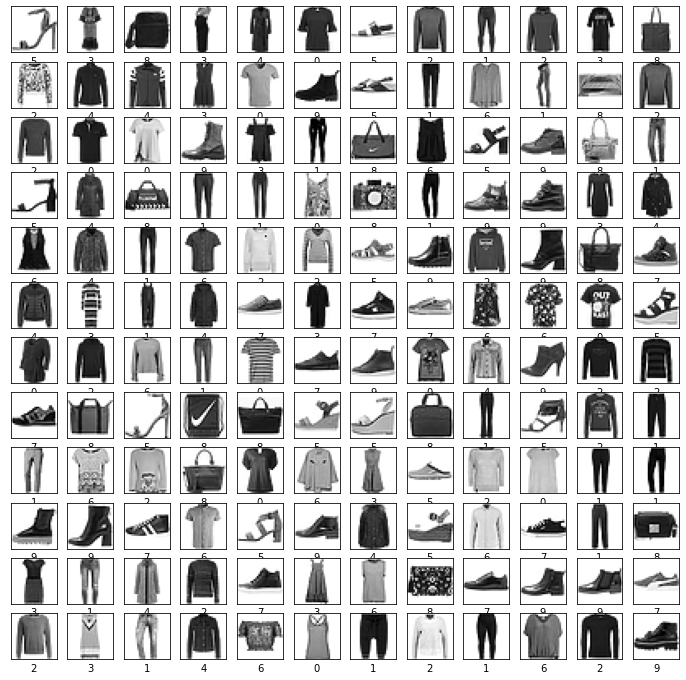

In [4]:
plt.figure(figsize=(12, 12))
random_inds = np.random.choice(train_images.shape[0], 144)
for i,v in enumerate(random_inds):
    plt.subplot(12, 12, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(train_images[v]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[v])

## 2.2. CNN model

### Define model

In [4]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        # First layer
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        
        # Second Layer
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        
        # Third layer
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        
        # Output layer
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    return cnn_model

### Train the model using *model.fit()*

In [5]:
epochs = 5
batch_size = 64

cnn_model = build_cnn_model()

cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

cnn_model.fit(train_images, train_labels,
              validation_data=(test_images, test_labels),
              epochs=epochs, batch_size=batch_size)

Epoch 1/5
938/938 [==============================] - 26s 27ms/step - loss: 0.5337 - accuracy: 0.8055 - val_loss: 0.4288 - val_accuracy: 0.8490
Epoch 2/5
938/938 [==============================] - 27s 28ms/step - loss: 0.3547 - accuracy: 0.8730 - val_loss: 0.3631 - val_accuracy: 0.8658
Epoch 3/5
938/938 [==============================] - 33s 35ms/step - loss: 0.3069 - accuracy: 0.8877 - val_loss: 0.3332 - val_accuracy: 0.8805
Epoch 4/5
938/938 [==============================] - 31s 33ms/step - loss: 0.2749 - accuracy: 0.8985 - val_loss: 0.3137 - val_accuracy: 0.8871
Epoch 5/5
938/938 [==============================] - 33s 36ms/step - loss: 0.2498 - accuracy: 0.9078 - val_loss: 0.2847 - val_accuracy: 0.8986


For this simple model, we are able to achieve an accuracy of approximately 0.91 (91%) on training set and 0.9 (90%) on validation set. Let's if we can do better using image augmentation

### Image augmentation

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation need to be done only on training data
train_datagen = ImageDataGenerator(
    #rescale=1/255., #No need because images already scaled
    rotation_range= 15,
    zoom_range=0.15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    fill_mode='nearest'
)

# No augmentation on validation nor test data
val_datagen = ImageDataGenerator(
    #rescale=1/255., #No need because images already scaled
)

In [8]:
train_datagen.fit(train_images)
val_datagen.fit(test_images)

In [9]:
epochs = 5
batch_size = 64

cnn_model = build_cnn_model()

cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

cnn_model.fit(train_datagen.flow(train_images, train_labels),
              validation_data=val_datagen.flow(test_images, test_labels),
              epochs=epochs, batch_size=batch_size)

Epoch 1/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.7821 - accuracy: 0.7087 - val_loss: 0.5482 - val_accuracy: 0.8010
Epoch 2/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.5789 - accuracy: 0.7788 - val_loss: 0.4459 - val_accuracy: 0.8323
Epoch 3/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.5170 - accuracy: 0.8056 - val_loss: 0.4136 - val_accuracy: 0.8452
Epoch 4/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.4747 - accuracy: 0.8222 - val_loss: 0.4311 - val_accuracy: 0.8375
Epoch 5/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.4504 - accuracy: 0.8310 - val_loss: 0.4247 - val_accuracy: 0.8437


### Evaluate model

In [10]:
train_loss, train_acc = cnn_model.evaluate(train_images, train_labels)

print('Train accuracy :', train_acc)

1875/1875 [==============================] - 10s 5ms/step - loss: 0.4004 - accuracy: 0.8465
Train accuracy : 0.8464666604995728


In [11]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

print('Test accuracy :', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.4247 - accuracy: 0.8437
Test accuracy : 0.8436999917030334


Even if, compared to previous non-augmented data, this augmented data model performance is lower, current model is more robust to image deformation and hence less prone to overfitting. To imporve this new model performance, one can for exemple:
1. Train longer
2. Use more complex network and adding regularization layers (such Dropout) to avoid overfitting
3. ...

# Part 3: Custom training loop using *tf.GradientTape()*

## 3.1 Optimizer, loss function and metrics

In [5]:
# Instantiate optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)

# Instantiate loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate metrics
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

## 3.2 Training and test functions

In [6]:
@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        logits = model(x, training=True)
        loss = loss_fn(y, logits)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    train_acc_metric.update_state(y, logits)
    return loss

In [7]:
@tf.function
def test_step(x, y):
    logits = model(x, training=False)
    test_acc_metric.update_state(y, logits)
    #return loss

## 3.3 Training loop

### Using *tf.data.Dataset* to prepare datasets

In [12]:
import time

# Instantiate the model
model = build_cnn_model()

# Set number of epochs and batchsize
epochs = 5
batch_size = 64

# Prepare training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

# Prepare test dataset
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_dataset = test_dataset.batch(batch_size)

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    start_time = time.time()
    
    if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists
    
    # Iterate over the batches of the dataset
    for step, (x_train_batch, y_train_batch) in tqdm(enumerate(train_dataset)):
        loss_value = train_step(x_train_batch, y_train_batch)
    
    # Display metrics at the end of each epoch
    train_acc = train_acc_metric.result()
    print("    Train Acc. %.4f" %(float(train_acc),))
    
    # Reset training metrics at the end of each epoch
    train_acc_metric.reset_states()
    
    # Run validation loop at the end of each epoch
    for x_test_batch, y_test_batch in test_dataset:
        test_step(x_test_batch, y_test_batch)
        
    # Display metrics at the end of each epoch
    test_acc = test_acc_metric.result()
    print("    Val. Acc. %.4f" %(float(test_acc),))
    
    # Reset validation metrics at the end of each epoch
    test_acc_metric.reset_states()
    
    print("    Time : %.2fs" % (time.time() - start_time))

Epoch 1/5


938it [00:22, 42.58it/s]


    Train Acc. 0.7923
    Val. Acc. 0.7792
    Time : 23.35s
Epoch 2/5


938it [00:22, 42.19it/s]


    Train Acc. 0.7956
    Val. Acc. 0.7930
    Time : 23.64s
Epoch 3/5


938it [00:24, 38.95it/s]


    Train Acc. 0.7981
    Val. Acc. 0.7944
    Time : 25.55s
Epoch 4/5


938it [00:23, 39.71it/s]


    Train Acc. 0.8030
    Val. Acc. 0.7972
    Time : 25.01s
Epoch 5/5


938it [00:23, 39.64it/s]


    Train Acc. 0.8045
    Val. Acc. 0.7847
    Time : 25.05s


### Using *raw* dataset

In [9]:
import time

# Instantiate the model
model = build_cnn_model()

# Set number of epochs and batchsize
epochs = 5
batch_size = 64

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    start_time = time.time()
    
    if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists
    
    # Iterate over the batches of the dataset
    for idx in tqdm(range(0, train_images.shape[0], batch_size)):
        # First grab a batch of training data and convert the input images to tensors
        (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
        images = tf.convert_to_tensor(images, dtype=tf.float32)
        #labels = tf.convert_to_tensor(labels, dtype=tf.int64)
        
        # Train model
        loss_value = train_step(images, labels)        
    
    # Display metrics at the end of each epoch
    train_acc = train_acc_metric.result()
    print("    Train Acc. %.4f" %(float(train_acc),))
    
    # Reset training metrics at the end of each epoch
    train_acc_metric.reset_states()
    
    # Run validation loop at the end of each epoch
    for idx in range(0, test_images.shape[0], batch_size):
        (val_images, val_labels) = (test_images[idx:idx+batch_size], test_labels[idx:idx+batch_size])
        val_images = tf.convert_to_tensor(val_images, dtype=tf.float32)
        val_labels = tf.convert_to_tensor(val_labels, dtype=tf.int64)
        test_step(val_images, val_labels)
        
    # Display metrics at the end of each epoch
    test_acc = test_acc_metric.result()
    print("    Val. Acc. %.4f" %(float(test_acc),))
    
    # Reset validation metrics at the end of each epoch
    test_acc_metric.reset_states()
    
    print("    Time : %.2fs" % (time.time() - start_time))

Epoch 1/5


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:23<00:00, 39.79it/s]


    Train Acc. 0.4214
    Val. Acc. 0.1134
    Time : 24.84s
Epoch 2/5


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:23<00:00, 40.05it/s]


    Train Acc. 0.6277
    Val. Acc. 0.1134
    Time : 24.77s
Epoch 3/5


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:26<00:00, 35.39it/s]


    Train Acc. 0.7099
    Val. Acc. 0.1134
    Time : 27.73s
Epoch 4/5


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:24<00:00, 38.34it/s]


    Train Acc. 0.7325
    Val. Acc. 0.1134
    Time : 25.86s
Epoch 5/5


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:24<00:00, 38.37it/s]


    Train Acc. 0.7445
    Val. Acc. 0.1134
    Time : 25.76s
